## First, let’s import the necessary libraries. The dataset we’ll be using is the Turkey Car Market 2020 dataset, which is available on Kaggle. Since I already have the dataset on my local environment, I will proceed directly with loading the data. If you don’t have the dataset, you can download it from Kaggle and load it into your project.

### Now, we will import the required libraries for data processing, regression modeling, and visualization. These libraries are essential for analyzing and building the model effectively.()

In [1]:
import numpy as np  # For numerical calculations
import pandas as pd  # For data processing and CSV file handling
from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets
from sklearn.linear_model import LinearRegression  # For regression modeling
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation metrics
from sklearn.ensemble import RandomForestRegressor  # Importing Random Forest Regressor from ensemble module
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #visualization

In [2]:
df = pd.read_csv("/kaggle/input/turkey-car-market-2020/turkey_car_market.csv")#importing data
df.head()  # Display the first few rows of the dataset to understand its structure

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
0,27/05/2020,Jaguar,XF,2.0 D Prestige Plus,2017.0,Dizel,Otomatik Vites,1801-2000 cc,176-200 BG,Lacivert,Hatchback 5 Kapı,Galeriden,2. El,26100,634500
1,16/06/2020,Acura,CL,-,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,101-125 BG,Mavi,Sedan,Sahibinden,2. El,127000,151500
2,14/06/2020,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Turkuaz,Sedan,Sahibinden,2. El,175000,19750
3,11/06/2020,Acura,CL,-,2013.0,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Kahverengi,Sedan,Sahibinden,2. El,325,52000
4,11/06/2020,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801-2000 cc,151-175 BG,Beyaz,Sedan,Sahibinden,2. El,207000,148750


In [3]:
df.isnull().sum()  # Check for missing values in each column


İlan Tarihi       0
Marka             0
Arac Tip Grubu    0
Arac Tip          0
Model Yıl         0
Yakıt Turu        0
Vites             0
CCM               0
Beygir Gucu       0
Renk              0
Kasa Tipi         0
Kimden            0
Durum             0
Km                0
Fiyat             0
dtype: int64

## Since there are no missing values, we can proceed to the next step, which is feature vectorization.


In [4]:
# Example: Using One-Hot Encoding for categorical features
df_encoded = pd.get_dummies(df, drop_first=True)  # Drop first to avoid multicollinearity

# Check the updated column names after encoding
df_encoded.columns


Index(['Model Yıl', 'Km', 'Fiyat', 'İlan Tarihi_01/05/2020',
       'İlan Tarihi_01/06/2020', 'İlan Tarihi_02/04/2020',
       'İlan Tarihi_02/05/2020', 'İlan Tarihi_02/06/2020',
       'İlan Tarihi_03/04/2020', 'İlan Tarihi_03/05/2020',
       ...
       'Kasa Tipi_Roadster', 'Kasa Tipi_Sedan', 'Kasa Tipi_Spor / Coupe',
       'Kasa Tipi_Station Wagon', 'Kasa Tipi_Üstü Açık / Cabriolet',
       'Kimden_Sahibinden', 'Kimden_Yetkili', 'Durum_2. El', 'Durum_Hasarlı',
       'Durum_Klasik'],
      dtype='object', length=2355)

In [5]:
df_encoded.head()

,Model Yıl,Km,Fiyat,İlan Tarihi_01/05/2020,İlan Tarihi_01/06/2020,İlan Tarihi_02/04/2020,İlan Tarihi_02/05/2020,İlan Tarihi_02/06/2020,İlan Tarihi_03/04/2020,İlan Tarihi_03/05/2020,...,Kasa Tipi_Roadster,Kasa Tipi_Sedan,Kasa Tipi_Spor / Coupe,Kasa Tipi_Station Wagon,Kasa Tipi_Üstü Açık / Cabriolet,Kimden_Sahibinden,Kimden_Yetkili,Durum_2. El,Durum_Hasarlı,Durum_Klasik
0,2017.0,26100,634500,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2015.0,127000,151500,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,1994.0,175000,19750,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
3,2013.0,325,52000,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
4,2010.0,207000,148750,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False


In [6]:
# Convert True/False values to 0/1
df_encoded = df_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# Check the result
df_encoded.head()


<ipython-input-6-abc9fa145e4c>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded = df_encoded.applymap(lambda x: 1 if x is True else (0 if x is False else x))


,Model Yıl,Km,Fiyat,İlan Tarihi_01/05/2020,İlan Tarihi_01/06/2020,İlan Tarihi_02/04/2020,İlan Tarihi_02/05/2020,İlan Tarihi_02/06/2020,İlan Tarihi_03/04/2020,İlan Tarihi_03/05/2020,...,Kasa Tipi_Roadster,Kasa Tipi_Sedan,Kasa Tipi_Spor / Coupe,Kasa Tipi_Station Wagon,Kasa Tipi_Üstü Açık / Cabriolet,Kimden_Sahibinden,Kimden_Yetkili,Durum_2. El,Durum_Hasarlı,Durum_Klasik
0,2017.0,26100,634500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2015.0,127000,151500,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,1994.0,175000,19750,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
3,2013.0,325,52000,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,2010.0,207000,148750,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


In [7]:
# Optionally reduce the dataset by selecting the top N columns that you know are relevant
# You can also sample the data if it's too large
df_sample = df_encoded.sample(frac=0.1)  # Takes 10% of the dataset

# Calculate correlation matrix for the sample
correlation_matrix = df_sample.corr()

# Get the top 10 features correlated with 'Fiyat'
top_features = correlation_matrix['Fiyat'].abs().sort_values(ascending=False).head(10)
print(top_features)



Fiyat                               1.000000
Arac Tip_1.4 CRDI Jump              0.631564
Marka_Land Rover                    0.365754
Marka_Porsche                       0.315923
Arac Tip_Turbo S                    0.299726
Arac Tip Grubu_911                  0.299726
CCM_2501-3000 cc                    0.286169
Arac Tip Grubu_Range Rover Sport    0.251815
Model Yıl                           0.245403
Km                                  0.235768
Name: Fiyat, dtype: float64


### As we can see from the correlation values, the features that have the most impact on the price are:

Vehicle Type Group "G Series" (0.34)
CCM 2501-3000 cc (0.33)
Condition "2nd Hand" (0.30)
Vehicle Type "63 AMG" (0.30)
Model Year (0.29)
Gear Type "Automatic" (0.29)
Brand "Porsche" (0.29)
Brand "Land Rover" (0.29)
Distance driven (Km) (0.28)
These are the most influential factors on price, as they have the highest correlation coefficients. Now, let's move on to the model training phase.

In [8]:
# Define the features and target variable
X = df_encoded.drop(columns=['Fiyat'])  # Drop 'Fiyat' column as it's the target variable
y = df_encoded['Fiyat']  # 'Fiyat' column is the target (the variable we are predicting)

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # 100 trees for the Random Forest

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate the R-squared value to evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")  # Print the R-squared value to see how well the model fits the data


R-squared: 0.7373411569216475


## As we can see, the R-squared value is 0.737, which indicates a relatively good fit for the model. However, since I'm using this dataset for educational purposes, I'm satisfied with a 73% R-squared value. If you had access to a more significant dataset, you could clean it, add more features, and make improvements to get more accurate results.

In [9]:
# Randomly select 5 indices from the test set
random_indices = random.sample(range(len(X_test)), 5)

# Get the features of the selected cars
random_cars = X_test.iloc[random_indices]

# Predict the prices for the selected cars
predicted_prices = rf_model.predict(random_cars)

# Create a DataFrame to display the features and predicted prices
predicted_df = random_cars.copy()
predicted_df['Predicted Fiyat'] = predicted_prices

# Print the result
print(predicted_df)

      Model Yıl      Km  İlan Tarihi_01/05/2020  İlan Tarihi_01/06/2020  \
2627     2018.0   53000                       0                       0   
5382     2007.0  225000                       0                       0   
5965     2000.0  305000                       0                       0   
73       2011.0  146000                       0                       0   
5193     2017.0   73000                       0                       0   

      İlan Tarihi_02/04/2020  İlan Tarihi_02/05/2020  İlan Tarihi_02/06/2020  \
2627                       0                       0                       0   
5382                       0                       0                       0   
5965                       0                       0                       0   
73                         0                       0                       0   
5193                       0                       0                       0   

      İlan Tarihi_03/04/2020  İlan Tarihi_03/05/2020  İlan Tarihi_03

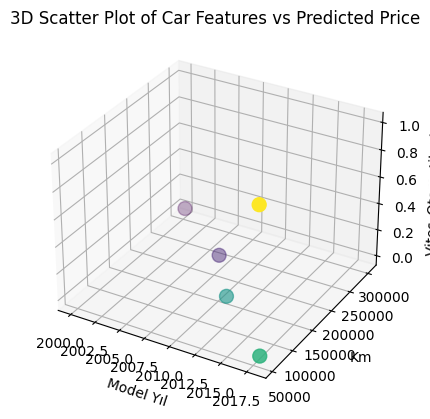

In [10]:
# Select three features for the 3D plot
feature_1 = 'Model Yıl'  # You can change this to any feature
feature_2 = 'Km'         # You can change this to any feature
feature_3 = 'Vites_Otomatik Vites'  # You can change this to any feature

# Get the values for the selected features and predicted prices
x = random_cars[feature_1]
y = random_cars[feature_2]
z = random_cars[feature_3]
predicted_prices = predicted_df['Predicted Fiyat']

# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(x, y, z, c=predicted_prices, cmap='viridis', s=100)

# Labels
ax.set_xlabel(feature_1)
ax.set_ylabel(feature_2)
ax.set_zlabel(feature_3)
ax.set_title('3D Scatter Plot of Car Features vs Predicted Price')

# Show the plot
plt.show()

## As you can see, the results obtained are reasonably close to the values in the data and can be considered acceptable. My work here is done, and I wish you success in your endeavors. Have a great day!
